In [ ]:
!pip install mord
!pip install pydantic-settings
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing, linear_model
from sklearn.model_selection import KFold , GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator
from statsmodels.miscmodels.ordinal_model import OrderedModel
from mord import LogisticIT

# **Load Dataset**

# New Section

In [ ]:
data=pd.read_csv("/content/NY23.csv")

<ipython-input-38-e4deddc11271>:1: DtypeWarning: Columns (36,38,39,71,73,96,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/NY23.csv")


# -----------------------------------------------------------------------------------



# **Preprocessing**

*   **Remove null features**


In [ ]:
null_col = data.columns[(data.isnull().sum()/ data.shape[0])>0.75]
data2 = data.drop(null_col,axis=1)

* **Fill missing values**


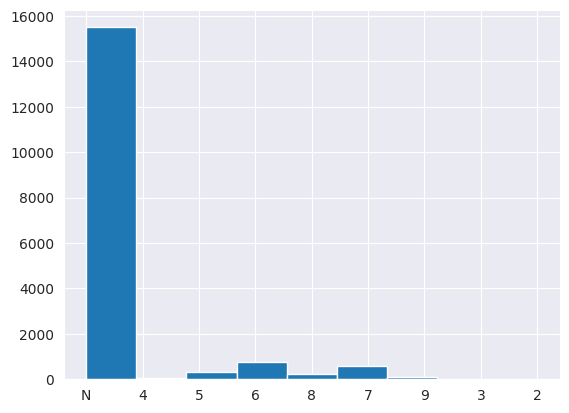

In [ ]:
counts, edges, bars =plt.hist(data2['CULVERT_COND_062'],bins=9)
d3 = data2[data2['CULVERT_COND_062']=='N'].index
randidx = d3[np.random.randint(0,d3.shape[0],400)]



In [ ]:
print(data['BRIDGE_CONDITION'].unique())
print(data['DECK_COND_058'].unique())
print(data['SUPERSTRUCTURE_COND_059'].unique())
print(data['SUBSTRUCTURE_COND_060'].unique())
#data[['BRIDGE_CONDITION','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060'] ]

['F' 'P' 'G']
['N' '6' '9' '5' '7' '8' '4' '3' '2' '1' '0']
['5' '6' '4' '7' '9' 'N' '8' '3' '2' '1' '0']
['5' '6' '9' '7' '8' 'N' '4' '3' '2' '1' '0']


In [ ]:
#ww= data[data['DECK_COND_058']=='5'].value_counts()
data['DECK_COND_058'].value_counts()

7    4421
6    3861
N    2818
5    2308
8    2293
9    1328
4     504
3      35
2       3
1       1
0       1
Name: DECK_COND_058, dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17573 entries, 0 to 17572
Columns: 113 entries, STATE_CODE_001 to DECK_AREA
dtypes: float64(27), int64(47), object(39)
memory usage: 15.2+ MB


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.metrics import accuracy_score



In [ ]:
# Generate synthetic data with three ordinal output variables
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=9, n_clusters_per_class=1, random_state=42)
y= np.concatenate((np.reshape(y,(-1,1)),np.reshape(y,(-1,1))),axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Create and train an ordinal logistic regression model
ordinal_model = MultiOutputRegressor(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
ordinal_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ordinal_model.predict(X_test)

accuracy = ordinal_model.score(X_test,y_test)
# Evaluate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: -0.06


In [ ]:
import numpy as np

rng = np.random.RandomState(0)
data = np.linspace(0, 30, num=1_000).reshape(-1, 1)
target = np.sin(data).ravel()

In [ ]:
inputs = np.random.random((32, 10, 8))
simple_rnn = keras.layers.SimpleRNN(4)
output = simple_rnn(inputs)  # The output has shape `(32, 4)`.
simple_rnn = keras.layers.SimpleRNN(
    4, return_sequences=True, return_state=True
)
# whole_sequence_output has shape `(32, 10, 4)`.
# final_state has shape `(32, 4)`.
whole_sequence_output, final_state = simple_rnn(inputs)

In [ ]:
import numpy as np
x = np.array([1, 2, 3,4,5,6,7,8,9])
# Reshape the input to the required sample_size x time_steps x features
Y_ind = np.arange(2, len(x), 2)
Y = x[Y_ind]
Y

array([3, 5, 7, 9])

In [ ]:
rows_x = len(Y)
X = x[range(2*rows_x)]
X = np.reshape(X, (rows_x, 2, 1))
X

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (99,1), activation=['linear', 'linear'])


In [ ]:
demo_model.summary()

In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[0.42764962 1.1413797 ]]  wh =  [[ 0.5333096   0.84592015]
 [ 0.84592015 -0.5333096 ]]  bh =  [0. 0.]  wy = [[-0.9776005]
 [ 0.9958323]] by =  [0.]


In [ ]:
#x = np.array([1, 2, 3, 4, 5])
x = np.arange(1,100,1)
# Reshape the input to the required sample_size x time_steps x features
x_input = np.reshape(x,(1, 99, 1))
y_pred_model = demo_model.predict(x_input)


"""m = 2
h0 = np.zeros(m)
print("h0",h0,h0.shape)
h1 = np.dot(x[0], wx) + h0 + bh
print("h1",h1,h1.shape)
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
print("h2",h2,h2.shape)
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
print("h3",h3,h3.shape)
h4 = np.dot(x[3], wx) + np.dot(h3,wh) + bh
print("h4",h4,h4.shape)
h5 = np.dot(x[4], wx) + np.dot(h4,wh) + bh
print("h5",h5,h5.shape)
o3 = np.dot(h5, wy) + by
print("o3",o3,o3.shape)

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)"""

print("Prediction from network ", y_pred_model)
#print("Prediction from our computation ", o3)


1/1 [==============================] - 0s 146ms/step
Prediction from network  [[-1664.9102]]


In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

import pandas as pd
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    #print(Y_ind)
    Y = dat[Y_ind]
    #print(Y)
    # Prepare X
    rows_x = len(Y)
    #print(rows_x)
    X = dat[range(time_steps*rows_x)]
    #print(X.shape)
    X = np.reshape(X, (rows_x, time_steps, 1))
    #print(X.shape)
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
#print(trainX)
#print(trainY.shape)

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 7ms/step
Train RMSE: 0.059 RMSE
Test RMSE: 0.084 RMSE


In [ ]:
[test_predict, testY]

In [ ]:
np.random.randint(0, 1000)

-2.5


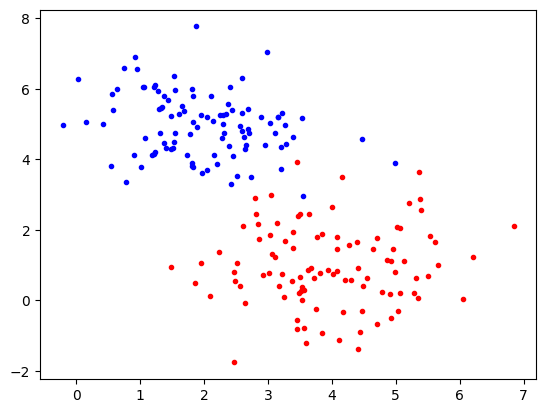

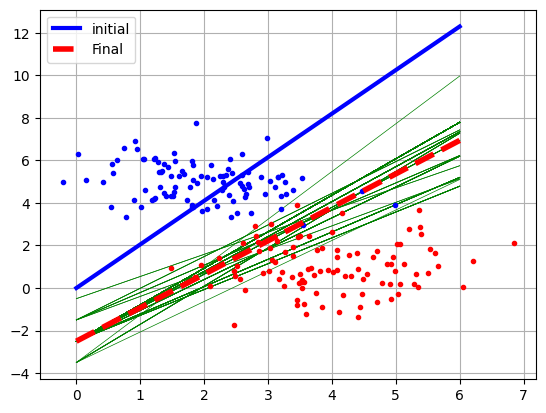

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters, make_blobs
from sklearn import model_selection

minxc1 = 2
maxxc1 = 5
minxc2 = 4
maxxc2 = 1

c1 = np.array(np.random.standard_normal((100,2)))+(minxc1,maxxc1)
c2 = np.array(np.random.standard_normal((100,2)))+(minxc2,maxxc2)
yc1 = np.ones((100,1), dtype=np.int32)
yc2 = np.zeros((100,1),dtype=np.int32)
Y = np.concatenate((yc1,yc2),axis=0)
X = np.concatenate((c1,c2),axis=0)
xtrain, xtest ,ytrain, ytest = model_selection.train_test_split(X,Y,test_size=0.1)
plt.plot(c1[:,0], c1[:,1], 'b.')
plt.plot(c2[:,0], c2[:,1], 'r.')

def hardlim(z ):
  if z <0:
    return 0
  else:
    return 1

def trainw(w , x ,y,b, alpha = 0.01):
  prediction = hardlim(x.dot(w.T)+b)
  #print(prediction)
  error = (y - prediction )
  #print(error)
  if error!=0 :
    w = w + alpha *(error * x)
    b = b + error

  return w,b

weights = np.random.rand(1,2)

line = np.arange(np.min([minxc1,minxc2], axis=0)-2, np.max([maxxc1, maxxc2],axis=0)+2)
fig, ax = plt.subplots()
slop = weights[0,1]/ weights[0,0]
b =0.5
ax.plot(line ,slop*line,'b', linewidth=3 ,label="initial")
for i in range (len(xtrain)):
  (weights,b ) =trainw(weights , xtrain[i,:], ytrain[i,0],b )
  #print(b)
  slop = weights[0,1]+0.1/ weights[0,0]
  plt.plot(line ,(slop*line)+b,'g', linewidth=0.5 )

plt.plot(c1[:,0], c1[:,1], 'b.')
plt.plot(c2[:,0], c2[:,1], 'r.')
plt.plot(line, (slop*line)+b,'r--', linewidth=4,label="Final")
print(b)
plt.legend()
plt.grid()